In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.moment_helpers import corr2cov
np.random.seed(5000)

In [26]:
def plot(df1, df2):
    fig = plt.figure(figsize=(8, 2))
    ax = fig.add_subplot(1, 2, 1)
    df1.plot(ax=ax)
    ax = fig.add_subplot(1, 2, 2)
    df2.plot(ax=ax)
    print("LHS values: {}".format(df1["y"].values))
    return fig, ax

def plot_wrapper(params, initial_state):
    df1 = pd.DataFrame(mod.simulate(params=params, nsimulations=5, initial_state=initial_state))
    df2 = pd.DataFrame(mod.simulate(params=params, nsimulations=300, initial_state=initial_state))
    fig, ax = plot(df1, df2)
    return fig, ax, df1, df2

## Time series - simulating known processes

Notes:
 - *endog* defines the time units used; it is important to explicitly do this, otherwise trend components are not treated corerctly
 - Notice required trend offset when we begin at $y_0 = 0$!

Links:

 - [statsmodels.tsa.statespace.structural.UnobservedComponents](https://www.statsmodels.org/devel/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html)
 - [statsmodels.tsa.statespace.structural.UnobservedComponents.simulate](https://www.statsmodels.org/devel/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.simulate.html#statsmodels.tsa.statespace.structural.UnobservedComponents.simulate)
 - [statespace.varmax](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.varmax.VARMAX.html) and [statespace.varmax.simulate](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.varmax.VARMAX.simulate.html)
 - [Estimating or specifying parameters in state space models](https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_fixed_params.html)

### Univariate

Some are done under *statespace.varmax* class for easier generalization to multivariate case. We could also use univariate classes like *ar_model.AR*.

$y_t = ct$

$t \geq 1$, with $y_0 = 0$, and $c=1$.

$
\begin{align*}
y_1 & = 1*1 = 1 \\
y_2 & = 1*2 = 2 \\
y_3 & = 1*3 = 3 \\
y_4 & = 1*4 = 4 \\
\dots
\end{align*}
$

Parameters: ('drift.y', 'L1.y.y', 'sqrt.var.y')
Fixed values: (1, 0, 0)
LHS values: [0. 1. 2. 3. 4.]


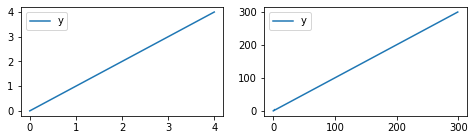

In [6]:
initial_state = 0
params = [1, 0, 0]

endog = pd.DataFrame({"y":[np.nan, np.nan]}, index=[0, 1])
mod = sm.tsa.VARMAX(endog, order=(1, 0), trend="t", trend_offset=0)
print(f"Parameters: {*mod.param_names,}")
print(f"Fixed values: {*params,}")

fig, ax, df1, df2 = plot_wrapper(params, initial_state)

$y_t = ct + y_{t-1}$

$t \geq 1$, with $y_0 = 1$, and $c=1$.

$
\begin{align*}
y_1 & = 1*1 + 1 = 2 \\
y_2 & = 1*2 + 2 = 4 \\
y_3 & = 1*3 + 4 = 7 \\
y_4 & = 1*4 + 7 = 11 \\
\dots
\end{align*}
$

Parameters: ('drift.y', 'L1.y.y', 'sqrt.var.y')
Fixed values: (1, 1, 0)
LHS values: [ 1.  2.  4.  7. 11.]


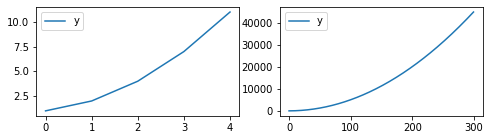

In [7]:
initial_state = 1
params = [1, 1, 0]

endog = pd.DataFrame({"y":[np.nan, np.nan]}, index=[0, 1])
mod = sm.tsa.VARMAX(endog, order=(1, 0), trend="t", trend_offset=0)
print(f"Parameters: {*mod.param_names,}")
print(f"Fixed values: {*params,}")

fig, ax, df1, df2 = plot_wrapper(params, initial_state)

$y_t = \gamma + ct + y_{t-1}$

$t \geq 1$, with $y_0 = 1$, $\gamma = 2$, and $c=1$.

$
\begin{align*}
y_1 & = 2 + 1*1 + 1 = 4 \\
y_2 & = 2 + 1*2 + 4 = 8 \\
y_3 & = 2 + 1*3 + 8 = 13 \\
y_4 & = 2 + 1*4 + 13 = 19 \\
\dots
\end{align*}
$

Parameters: ('intercept.y', 'drift.y', 'L1.y.y', 'sqrt.var.y')
Fixed values: (2, 1, 1, 0)
LHS values: [ 1.  4.  8. 13. 19.]


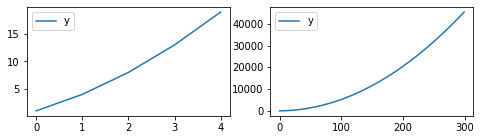

In [8]:
initial_state = 1
params = [2, 1, 1, 0]

endog = pd.DataFrame({"y":[np.nan, np.nan]}, index=[0, 1])
mod = sm.tsa.VARMAX(endog, order=(1, 0), trend=[1, 1], trend_offset=0)
print(f"Parameters: {*mod.param_names,}")
print(f"Fixed values: {*params,}")

fig, ax, df1, df2 = plot_wrapper(params, initial_state)

Random walk

$
\begin{align*}
y_t & = \mu_t \\
\mu_t & = \mu_{t-1} + \eta_t \\
\end{align*}
$

Parameters: ('sigma2.level',)
Fixed values: (1,)
LHS values: [ 1.         -0.29473187  0.43769062  0.46381847  0.37450675]


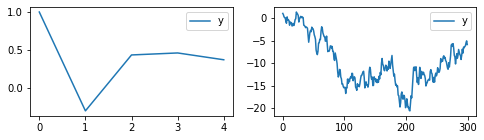

In [13]:
initial_state = 1
params = [1]

endog = pd.DataFrame({"y":[np.nan, np.nan]}, index=[0, 1])
mod = sm.tsa.UnobservedComponents(endog, level="rwalk")
print(f"Parameters: {*mod.param_names,}")
print(f"Fixed values: {*params,}")

fig, ax, df1, df2 = plot_wrapper(params, initial_state)

## Univariate unobserved components model



### Multivariate

Correlated random walk

$y_t = y_{t-1} + e_t$ with $t \geq 1$ and $y_0 = 1$,

$
\begin{align*}
y_t = \begin{bmatrix} y_{1,t} \\  y_{2,t} \end{bmatrix}
\end{align*}
$,
$
\begin{align*}
e_t = \begin{bmatrix} \epsilon_{1,t} \\  \epsilon_{2,t} \end{bmatrix}
\end{align*}
$

Errors $\epsilon_{1,t}, \epsilon_{2,t}$ follow multivariate normal dsitribution with covariance matrix

$
\begin{align*}
e_t = \begin{bmatrix} 1 & 0.8 \\ 0.8 &  1 \end{bmatrix}
\end{align*}
$


Parameters: ('L1.y.y', 'L1.y2.y', 'L1.y.y2', 'L1.y2.y2', 'sqrt.var.y', 'sqrt.cov.y.y2', 'sqrt.var.y2')
Fixed values: (1, 0, 0, 1, 1.0, 0.8944271909999159, 1.0)
LHS values: [ 0.         -0.33681648 -0.41743828 -2.17414254 -4.32494547]


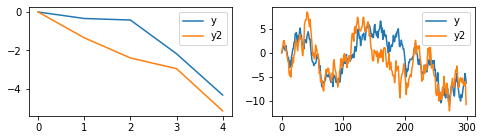

In [28]:
initial_state = [0, 0]
params = [1, 0, 0, 1, np.sqrt(1), np.sqrt(0.8), np.sqrt(1)]

endog = pd.DataFrame({"y":[np.nan, np.nan], "y2":[np.nan, np.nan]}, index=[0, 1])
mod = sm.tsa.VARMAX(endog, order=(1, 0), trend="n", trend_offset=0)
print(f"Parameters: {*mod.param_names,}")
print(f"Fixed values: {*params,}")

fig, ax, df1, df2 = plot_wrapper(params, initial_state)

## Vector auto-regression

Data-generating VAR(1) process reads

$
\begin{align*}
Y_{1,t} & = \beta_{1,0} + \beta_{1,1} Y_{1,t-1} + \beta_{1,2} Y_{2,t-1} + \epsilon_{1,t} \\
Y_{2,t} & = \beta_{2,0} + \beta_{2,1} Y_{1,t-1} + \beta_{2,2} Y_{2,t-1} + \epsilon_{2,t} \\
\end{align*}
$

with coefficient matrix

$
\begin{align*}
\mathbf{B} = \begin{bmatrix} \beta_{1,0} & \beta_{1,1} & \beta_{1,2} \\ \beta_{2,0} & \beta_{2,1} & \beta_{2,2} \end{bmatrix} =
\begin{bmatrix} 0 & 0.8 & 0.5 \\ 3 & -0.2 & 0.1 \end{bmatrix}
\end{align*}
$

Errors $\epsilon_{1,t}, \epsilon_{2,t}$ follow multivariate normal dsitribution with covariance matrix

$
\begin{align*}
\mathbf{\Sigma} = \begin{bmatrix} 1 & 0.4 \\ 0.4 & 1 \end{bmatrix} ,
\end{align*}
$

meaning that $Corr(\epsilon_{1,t}, \epsilon_{2,t}) = 0.2$.




### VAR(1) with 2 variables

Parameters: ('intercept.y1', 'intercept.y2', 'L1.y1.y1', 'L1.y2.y1', 'L1.y1.y2', 'L1.y2.y2', 'sqrt.var.y1', 'sqrt.cov.y1.y2', 'sqrt.var.y2')
Fixed values: (0.0, 3.0, 0.8, 0.5, -0.2, 0.1, 1.0, 0.2, 1.0)


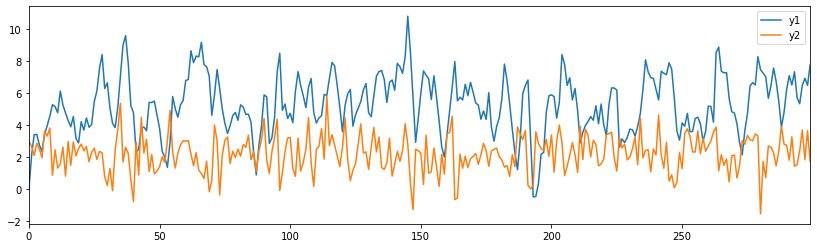

In [51]:
intercepts = np.array(
    [0, 3], #beta_01, beta_02
)
coefs = np.array([
       [0.8, 0.5], # beta_11, beta_12, 
       [-0.2, 0.1], # beta_21, beta_22
]).flatten(order="C")
corr = np.array([
    [1, 0.2],
    [0.2, 1],
])
stds = [1, 1] # std(e_1t), std(e_2t)
cov = corr2cov(corr, stds)

endog = np.array([[ None,  None]])
mod = sm.tsa.VARMAX(endog, order=(1, 0), trend="c")
print(f"Parameters: {*mod.param_names,}")
params = np.concatenate([intercepts, coefs, cov[np.triu_indices(cov.shape[1])]], axis=0)
print(f"Fixed values: {*params,}")
df = pd.DataFrame(mod.simulate(params=params, nsimulations=300, initial_state=intercepts), columns=["y1", "y2"])
plot(df)

### Correlated random walk with drift

Parameters: ('drift.y1', 'drift.y2', 'L1.y1.y1', 'L1.y2.y1', 'L1.y1.y2', 'L1.y2.y2', 'sqrt.var.y1', 'sqrt.cov.y1.y2', 'sqrt.var.y2')
Fixed values: (2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.8, 1.0)


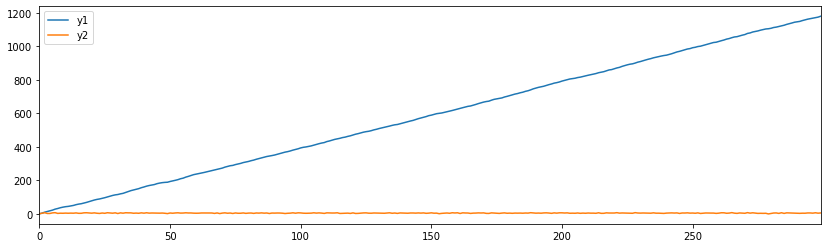

In [57]:
intercepts = np.array(
    [0, 0], #beta_01, beta_02
)
drifts = np.array(
    [2, 2],
)
coefs = np.array([
       [1, 0], # beta_11, beta_12, 
       [0, 0], # beta_21, beta_22
]).flatten(order="C")
corr = np.array([
    [1, 0.8],
    [0.8, 1],
])
stds = [1, 1] # std(e_1t), std(e_2t)
cov = corr2cov(corr, stds)

endog = np.array([[ None,  None]])
mod = sm.tsa.VARMAX(endog, order=(1, 0), trend="t")
print(f"Parameters: {*mod.param_names,}")
params = np.concatenate([drifts, coefs, cov[np.triu_indices(cov.shape[1])]], axis=0)
print(f"Fixed values: {*params,}")
df = pd.DataFrame(mod.simulate(params=params, nsimulations=300, initial_state=intercepts), columns=["y1", "y2"])
plot(df)

In [23]:
#print(mod.k_states)
#df.head(10)